In [1]:
SEED = 2137
DATA_PATH = "../data/"

In [2]:
import os
import re
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(SEED)
np.random.seed(SEED)

plt.rcParams['figure.figsize'] = [10, 5]

# List classes

In [3]:
classes = os.listdir(DATA_PATH)
print(f"Number of classes: {len(classes)}")
classes

Number of classes: 27


['Early_Renaissance',
 'Analytical_Cubism',
 'Mannerism_Late_Renaissance',
 'Expressionism',
 'Contemporary_Realism',
 'Fauvism',
 'Northern_Renaissance',
 'Rococo',
 'Ukiyo_e',
 'Pop_Art',
 'High_Renaissance',
 'Minimalism',
 'Art_Nouveau_Modern',
 'Action_painting',
 'Color_Field_Painting',
 'Symbolism',
 'Realism',
 'Romanticism',
 'Cubism',
 'Impressionism',
 'New_Realism',
 'Baroque',
 'Post_Impressionism',
 'Abstract_Expressionism',
 'Pointillism',
 'Synthetic_Cubism',
 'Naive_Art_Primitivism']

# Remove duplicates
Some of the files end with (1), (2) etc. which means that they are duplicates

In [4]:
n_duplicates = 0
for c in classes:
    files = os.listdir(DATA_PATH + c)
    for f in files:
        if f.endswith(").jpg"):
            os.remove(DATA_PATH + c + "/" + f)
            n_duplicates += 1
print(f"Removed {n_duplicates} duplicates")

Removed 2769 duplicates


# Number of samples

In [5]:
n_samples = sum([len(os.listdir(DATA_PATH + c)) for c in classes])
print(f"Number of samples: {n_samples}")

Number of samples: 78677


# Number of samples per class

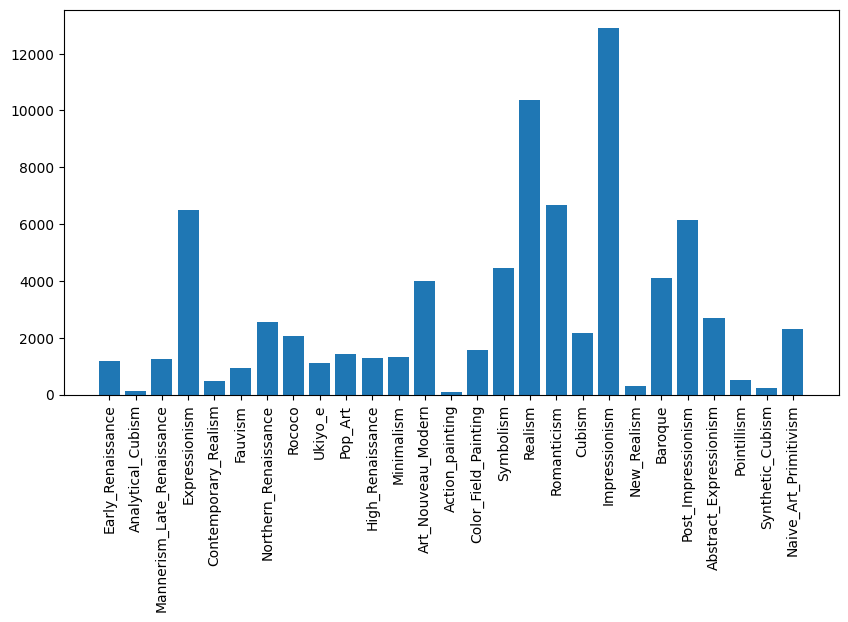

In [6]:
plt.bar(classes, [len(os.listdir(DATA_PATH + c)) for c in classes])
plt.xticks(rotation=90)
plt.show()

# Examples

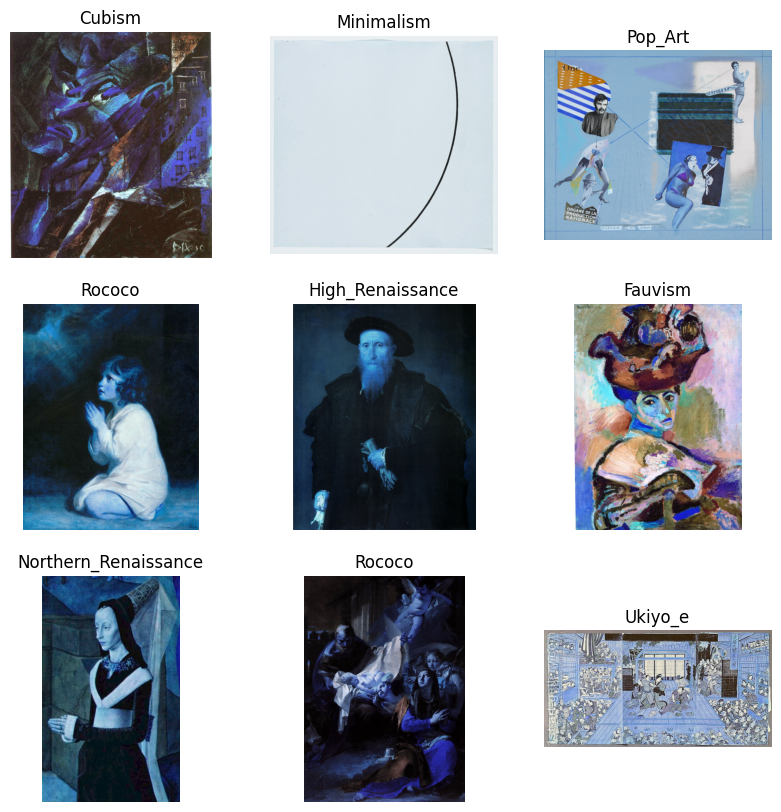

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        class_name = random.choice(classes)
        img_name = random.choice(os.listdir(DATA_PATH + class_name))
        img = cv2.imread(DATA_PATH + class_name + "/" + img_name)
        ax[i, j].imshow(img)
        ax[i, j].set_title(class_name)
        ax[i, j].axis('off')

# Merge classes into more general ones
If class name contains other class name, merge it into the other class

e.g. "Northern_Reneissance" -> "Reneissance"

In [8]:
for c1 in classes:
    for c2 in classes:
        if c1 != c2 and c1.split("_")[-1] == c2:
            print(f"{c1} -> {c2}")
            os.system(f"mv {DATA_PATH + c1}/* {DATA_PATH + c2}/")
            os.system(f"rm -r {DATA_PATH + c1}")
classes = os.listdir(DATA_PATH)

Analytical_Cubism -> Cubism
Contemporary_Realism -> Realism
New_Realism -> Realism
Post_Impressionism -> Impressionism
Abstract_Expressionism -> Expressionism
Synthetic_Cubism -> Cubism


# How many samples have more than one class?

In [9]:
# Use hashes to check if the image is unique, if not, it means that it has more than one class
hashes = set()
multilabel_imgs = []
for c in classes:
    for img_name in os.listdir(DATA_PATH + c):
        h = hash(img_name)
        if h not in hashes:
            hashes.add(h)
        else:
            multilabel_imgs.append(img_name)

print(f"Part of images with more than one class: {len(multilabel_imgs) / n_samples * 100:.2f}%")

Part of images with more than one class: 1.67%


It's not worth it to implement multi-label classification, because there are less than 1% of images with more than one class, so let's just remove them

In [10]:
for c in classes:
    for img_name in os.listdir(DATA_PATH + c):
        if img_name in multilabel_imgs:
            os.remove(DATA_PATH + c + "/" + img_name)
print(f"Number of removed images: {len(multilabel_imgs)}")

Number of removed images: 1310


# Remove classes with less than 20% of the most common class

In [11]:
max_class_size = max([len(os.listdir(DATA_PATH + c)) for c in classes])
classes_to_remove = [c for c in classes if len(os.listdir(DATA_PATH + c)) < 0.2 * max_class_size]

for c in classes_to_remove:
    os.system(f"rm -r {DATA_PATH + c}")

classes = os.listdir(DATA_PATH)
print(f"Max class size: {max_class_size}")
print(f"Classes to remove: {classes_to_remove}")

Max class size: 18691
Classes to remove: ['Early_Renaissance', 'Mannerism_Late_Renaissance', 'Fauvism', 'Northern_Renaissance', 'Rococo', 'Ukiyo_e', 'Pop_Art', 'High_Renaissance', 'Minimalism', 'Action_painting', 'Color_Field_Painting', 'Cubism', 'Pointillism', 'Naive_Art_Primitivism']


# Final statistics

Number of classes: 7
Number of samples: 56773


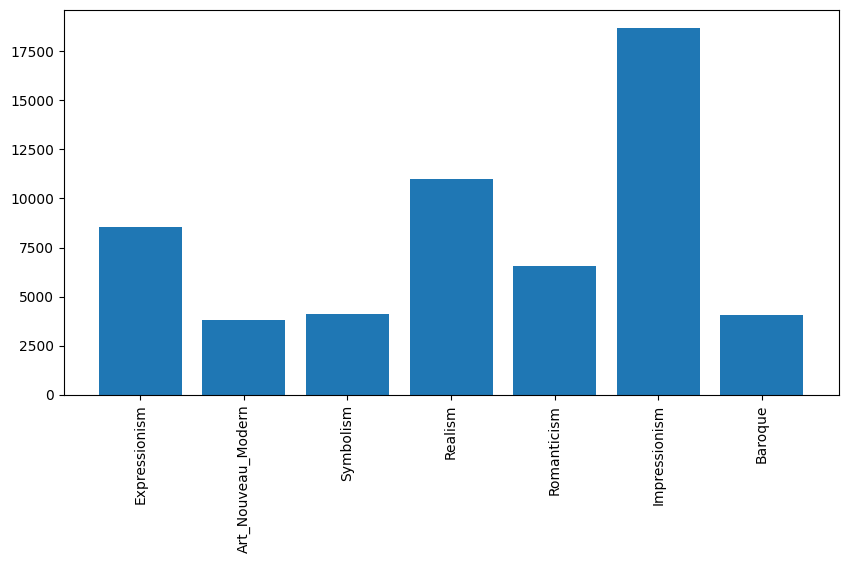

In [12]:
classes = os.listdir(DATA_PATH)
n_samples = sum([len(os.listdir(DATA_PATH + c)) for c in classes])
print(f"Number of classes: {len(classes)}")
print(f"Number of samples: {n_samples}")

plt.bar(classes, [len(os.listdir(DATA_PATH + c)) for c in classes])
plt.xticks(rotation=90)
plt.show()